Сухоруков Кирилл Евгеньевич


# Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
from itertools import cycle

# Подгрузка файла с Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
name_of_file= 'checkins.dat'
work_dir='/content/drive/My Drive/Colab Notebooks/'
path = work_dir+ name_of_file

# Чтение и предобработка данных

In [4]:
data=pd.read_table(path, sep='|', skipinitialspace=True, 
                   engine='python', skiprows=2, 
                   names=['id','user_id','venue_id',
                          'latitude','longitude','created_at'])

In [5]:
print(data)

                     id    user_id  ...  longitude           created_at
0               984301   2041916.0  ...        NaN  2012-04-21 17:39:01
1               984222     15824.0  ... -77.036366  2012-04-21 17:43:47
2               984315   1764391.0  ...        NaN  2012-04-21 17:37:18
3               984234     44652.0  ... -84.410520  2012-04-21 17:43:43
4               984249   2146840.0  ...        NaN  2012-04-21 17:42:58
...                 ...        ...  ...        ...                  ...
1021962         956119   1139114.0  ... -83.743830  2012-04-13 11:36:44
1021963         956447   2088020.0  ...        NaN  2012-04-13 12:58:05
1021964         956733    960666.0  ... -83.045754  2012-04-13 21:56:19
1021965         957139   1771518.0  ...        NaN  2012-04-14 02:44:52
1021966  (1021966 rows)        NaN  ...        NaN                 None

[1021967 rows x 6 columns]


In [6]:
data=data.drop(['id', 'user_id', 'venue_id','created_at'], axis='columns')

In [7]:
data=data[~data.isnull().any(axis=1)]

In [8]:
print(data)

          latitude   longitude
1        38.895112  -77.036366
3        33.800745  -84.410520
7        45.523452 -122.676207
9        40.764462 -111.904565
10       33.448377 -112.074037
...            ...         ...
1021959  40.850100  -73.866246
1021960  33.748995  -84.387982
1021961  42.765366  -71.467566
1021962  42.439479  -83.743830
1021964  42.331427  -83.045754

[396634 rows x 2 columns]


In [9]:
train_data=data.sample(100000, axis=0)

# Кластеризация при помощи MeanShift

Обучение кластеризатора

In [11]:
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(train_data, quantile=0.001, n_jobs=-1)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms.fit(train_data)

MeanShift(bandwidth=9.25813660574648, bin_seeding=True, n_jobs=-1)

# Визуализация кластеров

In [12]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

plot_title=f"Estimated number of clusters: {n_clusters_}"
train_data['cl'] = ms.labels_

IndexError: ignored

In [13]:
plt.figure(1, figsize=(25,30))
plt.clf()

clusters_size=[] #Массив для хранения координат центра кластера и его размера

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    cluster=train_data[my_members]
    clusters_size.append([cluster_center, cluster.shape[0]])
    plt.plot('longitude', 'latitude', col+'.', data=cluster)
    plt.plot(
        cluster_center[1],
        cluster_center[0],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=3,
    )
clusters_size=np.array(clusters_size, dtype=object)
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

# Вывод 20 наибольших кластеров и их отрисовка на карте при помощи сервиса [MapCustomizer](https://mapcustomizer.com)

In [15]:
def biggest_centers_for_mapcustomize(clusters_size, n):
  '''
  Функция для приведения n-го количества центров кластеров к требуемому 
  для множественного ввода на сервисе MapCustomizer формату

  На вход принимает массив координат центров кластеров с их размерами и 
  количество центров, координаты которых необходимо вывести в нужном формате

  Возвращает строку, которую можно скопировать и вставить в поле ввода Bulk Entry 
  на сервисе MapCustomizer

  '''
  biggest_centers=clusters_size[:n, 0]
  clusters_bulk=''
  for cluster in biggest_centers:
    clusters_bulk=clusters_bulk+f'{cluster[0]}, {cluster[1]}\n'
  return clusters_bulk

In [16]:
clusters_size[:, 1][::-1].sort()
print(biggest_centers_for_mapcustomize(clusters_size, 20))

Изображение 20 наибольших кластеров на карте

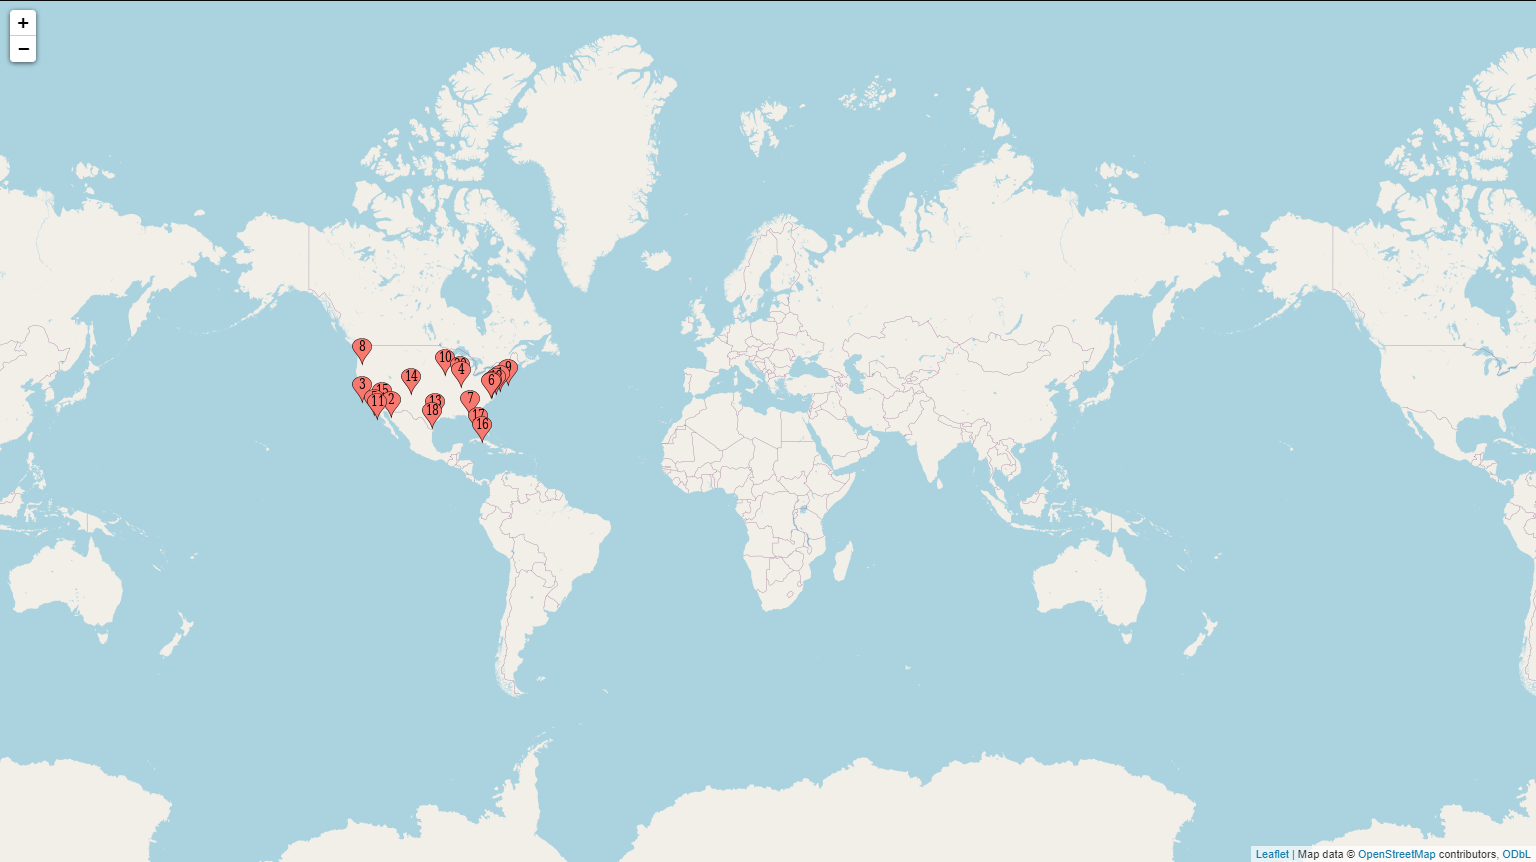

Увеличенный фрагмент изображения 20 наибольших кластеров на карте

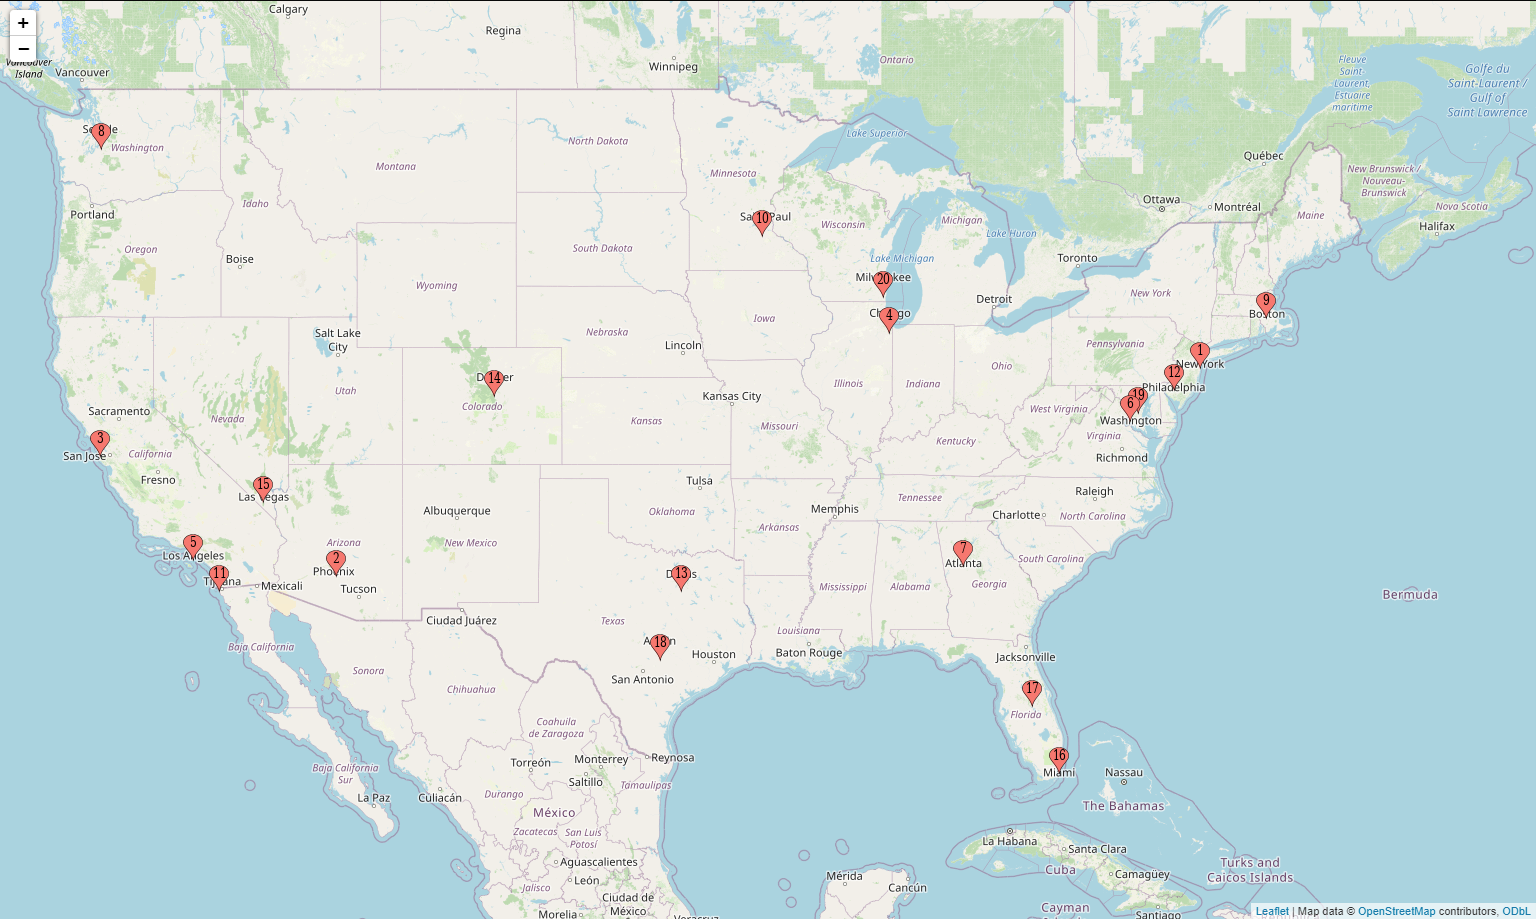

# **ВЫВОД**

Как можно видеть по увеличенному фрагменту карты, 20 крупнейших кластеров соответствуют 20 крупнейшим городам США, следовательно, рекламые баннеры имеет смысл располагать именно в этих городах. Размещать баннеры следует рядом с рекреационными объектами этих городов, такими как парки, пляжи, торговые центры и т.д..

**Какую информацию ещё важно получить/проработать для повышения качества рекоммендации?**

Для повышения качества рекомендаций требуется получить большее число координат, для более точного вычисления координат центров кластеров, а также можно разбить полученные кластеры на подкластеры для получения лучшего представления о наиболее популярных в данных городах местах отдыха и развлечений. Также для повышения качества можно провести анализ профилей пользователей, входящих в анализируемую выборку, для оценки их предполагаемого уровня доходов и подстраивания под них рекламных баннеров.